## EJEMPLOS PRÁCTICOS CON PANDAS ------------------------------
### CLASE 13 (08-04-24)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
matplotlib.__version__

'3.8.4'

### PRACTICO REALIZADO EN CLASE - Pandas y Matplotlib ---------------------------

In [4]:
# Leer el archivo CSV
df = pd.read_csv('../auxiliares/datasets/datos_netflix.csv')

In [5]:
# Imprimir las columnas del DataFrame
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [28]:
# Imprimir la cantidad de filas y columnas
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [29]:
# Imprimir las primeras 5 filas
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [30]:
valores_unicos = df['director'].drop_duplicates()
print(valores_unicos)

0                     Kirsten Johnson
1                                 NaN
2                     Julien Leclercq
5                       Mike Flanagan
6       Robert Cullen, José Luis Ucha
                    ...              
8792                           Mu Chu
8798          Chandra Prakash Dwivedi
8801                  Majid Al Ansari
8805                     Peter Hewitt
8806                      Mozez Singh
Name: director, Length: 4529, dtype: object


In [31]:
conteo_por_director = df.groupby('director')['title'].count()
print(conteo_por_director)

director
A. L. Vijay            2
A. Raajdheep           1
A. Salaam              1
A.R. Murugadoss        2
Aadish Keluskar        1
                      ..
Çagan Irmak            1
Ísold Uggadóttir       1
Óskar Thór Axelsson    1
Ömer Faruk Sorak       2
Şenol Sönmez           2
Name: title, Length: 4528, dtype: int64


In [32]:
# Imprimir el conteo de películas por director
for director, cantidad in conteo_por_director.items():
    print('Director: ', director)
    print('Cantidad de películas: ', cantidad)
    print('-' * 30)

Director:  A. L. Vijay
Cantidad de películas:  2
------------------------------
Director:  A. Raajdheep
Cantidad de películas:  1
------------------------------
Director:  A. Salaam
Cantidad de películas:  1
------------------------------
Director:  A.R. Murugadoss
Cantidad de películas:  2
------------------------------
Director:  Aadish Keluskar
Cantidad de películas:  1
------------------------------
Director:  Aamir Bashir
Cantidad de películas:  1
------------------------------
Director:  Aamir Khan
Cantidad de películas:  1
------------------------------
Director:  Aanand Rai
Cantidad de películas:  1
------------------------------
Director:  Aaron Burns
Cantidad de películas:  1
------------------------------
Director:  Aaron Hancox, Michael McNamara
Cantidad de películas:  1
------------------------------
Director:  Aaron Hann, Mario Miscione
Cantidad de películas:  1
------------------------------
Director:  Aaron Lieber
Cantidad de películas:  1
------------------------------

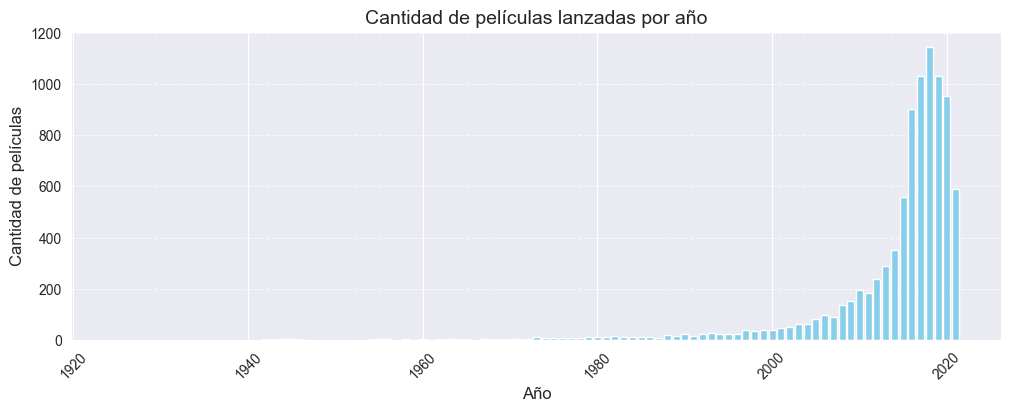

In [33]:
# Agrupar por año y contar cuantas películas se lanzaron en cada año
conteo_por_anio = df.groupby('release_year')['title'].count()

# Graficar el resultado
plt.figure(figsize=(12, 4))
plt.bar(conteo_por_anio.index, conteo_por_anio.values, color='skyblue')
plt.title('Cantidad de películas lanzadas por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de películas', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
conteo_por_anio = df.groupby('release_year')['title'].count()


In [34]:
# Cambiar formato de la columna 'date_added' a datetime
df['date_added_new'] = df['date_added'].str.strip()
df['date_added_new'] = pd.to_datetime(df['date_added_new'], format='%B %d, %Y', errors='coerce')
df['date_added_new'] = df['date_added_new'].dt.strftime('%Y-%m-%d')

# Imprimir las primeras 5 filas
print(df.tail())

     show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R   

In [35]:
# Imprimir la cantidad de películas por tipo
tipos_peliculas = df.groupby('type')['title'].count()
print(tipos_peliculas)

type
Movie      6131
TV Show    2676
Name: title, dtype: int64


In [36]:
# Normalizar los datos
por_pais = df.groupby('country')['title'].count()
print(por_pais)

# Separar los países
df['country_new'] = df['country'].str.split(', ')
df_countries = df.assign(country=df['country'].str.split(', ')).explode('country')

conteo_por_pais = df_countries['country'].value_counts().reset_index()
conteo_por_pais.columns = ['country', 'total']
print("--- Conteo por país formateado -------")
print(conteo_por_pais)


country
, France, Algeria                                       1
, South Korea                                           1
Argentina                                              56
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        2
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 7
West Germany                                            1
Zimbabwe                                                1
Name: title, Length: 748, dtype: int64
--- Conteo por país formateado -------
            country  total
0     United States   3689
1             India   1046
2    United Kingdom    804
3            Canada    445
4            France    393
..              ...    ...
122         Bermuda      1
123         Ecuador      1
124         Armenia      1
125   

### PRACTICO REALIZADO EN CLASE - Pandas y Seaborn ------------------------------

In [37]:
import seaborn as sns

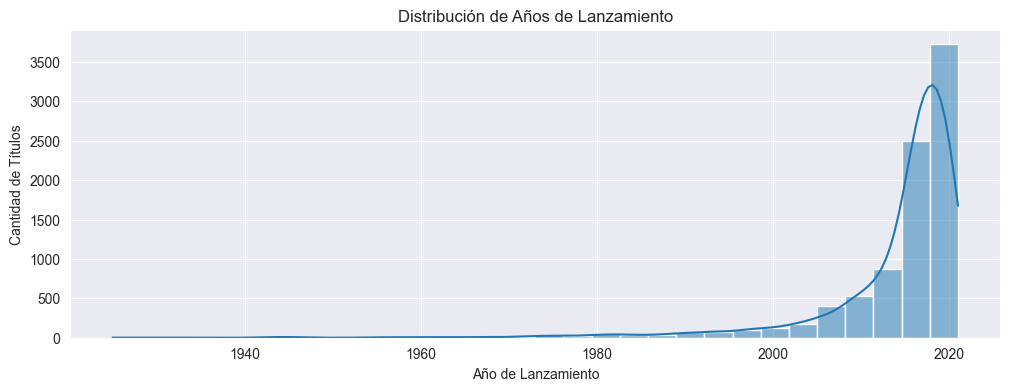

In [38]:
# Histograma de la distribución de años de Lanzamiento
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x='release_year', bins=30, kde=True)
plt.title('Distribución de Años de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Títulos')
plt.show()

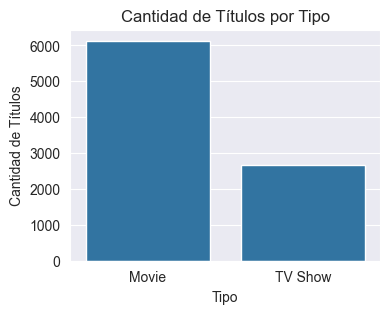

In [39]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='type')
plt.title('Cantidad de Títulos por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Cantidad de Títulos')
plt.show()

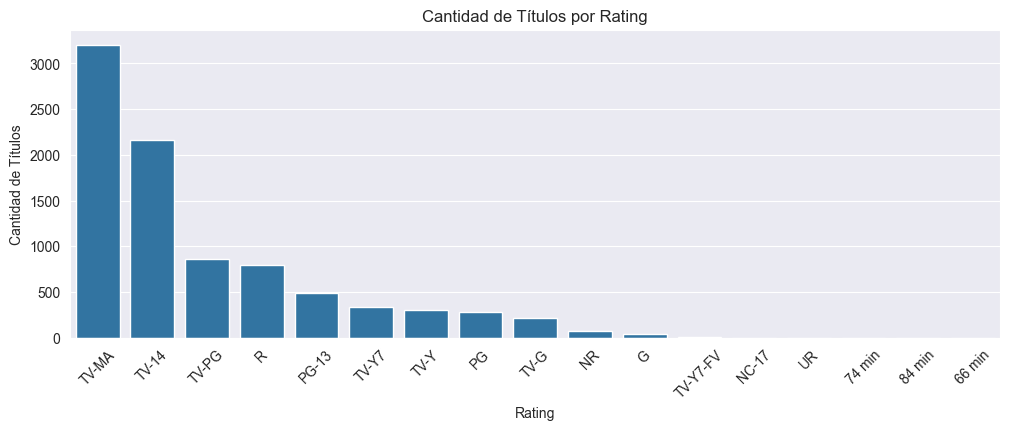

In [40]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Cantidad de Títulos por Rating')
plt.xlabel('Rating')
plt.ylabel('Cantidad de Títulos')
plt.xticks(rotation=45)
plt.show()

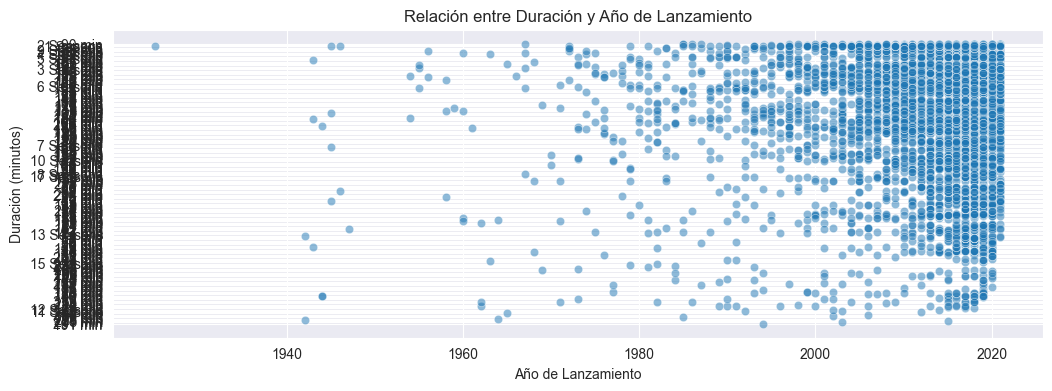

In [41]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df, x='release_year', y='duration', alpha=0.5)
plt.title('Relación entre Duración y Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (minutos)')
plt.show()

In [42]:
# Datos mas complejos con Seaborn
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## PRACTICO 6 - Pandas -------------------------------------------
### Clase 14 (10-04-24)

In [6]:
# Trabajar con archivos CSV de spotify y paises
df_paises = pd.read_csv('../auxiliares/datasets/datos_paises.csv')
print(df_paises)

# df_spotify = pd.read_csv('../auxiliares/datos_spotify.csv')
# print(df_spotify.head())

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49   